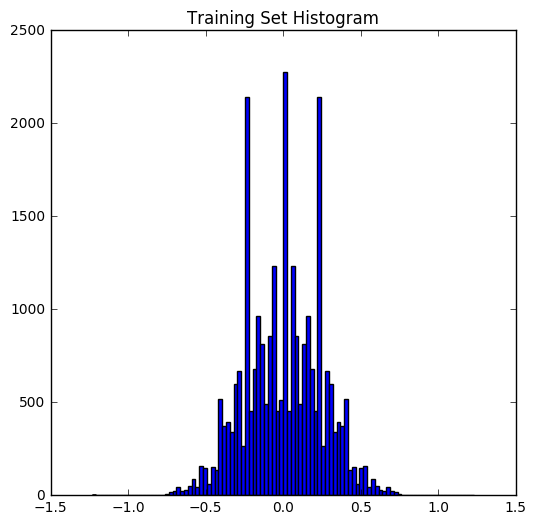

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

from data import load_samples

# Visualizations will be shown in the notebook.
%matplotlib inline

samples = load_samples("data")

steerings = np.asarray(samples)[:,1].astype(float)

fig = plt.figure(figsize=(6,6))
a=fig.add_subplot(1,1,1)
a.hist(steerings, 100, normed=0)
a.set_title("Training Set Histogram")
plt.show()

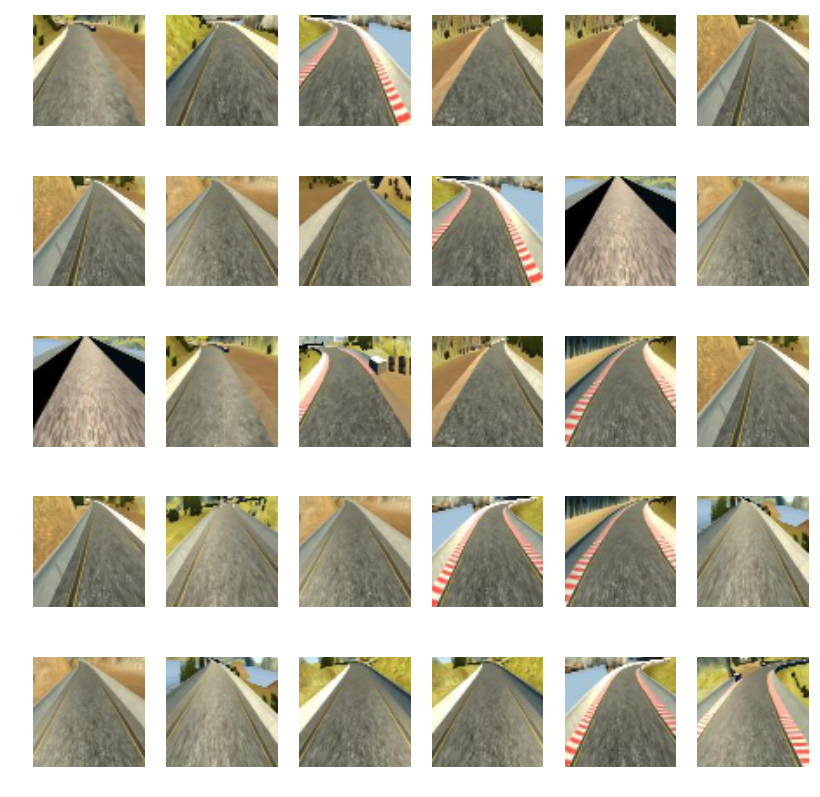

In [6]:
from model import generator
from model import croph
from model import cropw
from model import imgsize

h, w, c = imgsize

vertices = np.array([[(cropw[0], croph[0]), 
                      (w - cropw[1] - 1, croph[0]), 
                      (w - cropw[1] - 1, h - croph[1] - 1), 
                      (cropw[0], h - croph[1] - 1)]], dtype=np.int32)

def plot_image(image, ax):
    y, x, c = image.shape
    ax.set_axis_off()
    #img = cv2.polylines(image, 
    #                    vertices, 
    #                    True, [0,0,255], 1)

    imgplot = ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return imgplot

def plot_random_images(images, images2=None):
    fig, axes = plt.subplots(5,6, figsize=(12,12))
    
    for i , ax in enumerate(axes.flat):
        plot_image(random.choice(images), ax)
        
    plt.show()

for X_batch, y_batch in generator(samples, "data", 15):
    plot_random_images(X_batch)
    break